# Logitistic Regression
by Ben Royles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logitistic-Regression" data-toc-modified-id="Logitistic-Regression-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Logitistic Regression</a></span></li><li><span><a href="#Number-of-iterations" data-toc-modified-id="Number-of-iterations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Number of iterations</a></span></li><li><span><a href="#C-tuning" data-toc-modified-id="C-tuning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>C-tuning</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Final Model</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

df = pd.read_csv('complete.csv')
df.shape

(61845, 216)

In [2]:
# Getting a list of all the columns to be able to remove the non-numeric and predictive ones
df.columns.tolist()

['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'Match Week',
 'FullTimeResult',
 'DistanceTraveled in Km',
 'Weekday',
 'Month',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'A

In [3]:
df.drop(['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'DistanceTraveled in Km',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away'], axis=1, inplace=True)

In [4]:
df.dropna(inplace=True)
df.shape

(44565, 195)

# Number of iterations

In [5]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult'].map({
                                'A': 0,
                                'D': 1,
                                'H': 2
                                    })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Split the data into training and testing sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# Create a list to store the results for each max_iter value
results = []

# Define the max_iter values to test
max_iter_values = [50, 100, 250, 500, 1000, 1500, 2000, 10000]

# Iterate through the max_iter values and fit the logistic regression model
for max_iter in max_iter_values:
    # Create the logistic regression model
    model = LogisticRegression(max_iter=max_iter, random_state=42)
    
    # Record the start time
    start_time = time.time()
    
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Record the end time
    end_time = time.time()
    
    # Calculate the training and validation scores
    training_score = model.score(X_train_scaled, y_train)
    validation_score = model.score(X_validation_scaled, y_validation)
    
    # Store the results in a dictionary
    result = {
        'max_iter': max_iter,
        'Training Score': training_score,
        'Validation Score': validation_score,
        'Time': end_time - start_time
    }
    
    # Append the dictionary to the results list
    results.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Find the row with the highest validation score
best_row = results_df.loc[results_df['Validation Score'].idxmax()]

# Print the table of scores and the best max_iter value with the corresponding accuracy and time
print(results_df)
print()
print("Best max_iter value:", best_row['max_iter'])
print("Validation Accuracy with the best max_iter value:", best_row['Validation Score'])
print("Time taken for training with the best max_iter value:", best_row['Time'], "seconds")


C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

   max_iter  Training Score  Validation Score      Time
0        50        0.502928          0.490114  1.178443
1       100        0.502822          0.489973  1.284590
2       250        0.502822          0.489973  2.153040
3       500        0.502822          0.489973  2.343481
4      1000        0.502822          0.489973  2.116882
5      1500        0.502822          0.489973  1.794990
6      2000        0.502822          0.489973  1.559764
7     10000        0.502822          0.489973  1.522850

Best max_iter value: 50.0
Validation Accuracy with the best max_iter value: 0.49011358855700465
Time taken for training with the best max_iter value: 1.1784429550170898 seconds


# C-tuning


In [9]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult'].map({
                                'A': 0,
                                'D': 1,
                                'H': 2
                                    })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Split the data into training and testing sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Create a list to store the results for each C value
results = []

# Iterate through the C values and fit the logistic regression model
for C in C_values:
    # Create the logistic regression model
    model = LogisticRegression(C=C, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on the training set and validation set
    y_train_pred = model.predict(X_train_scaled)
    y_validation_pred = model.predict(X_validation_scaled)
    
    # Calculate the training and validation scores
    training_score = accuracy_score(y_train, y_train_pred)
    validation_score = accuracy_score(y_validation, y_validation_pred)
    
    # Store the results in a dictionary
    result = {'C': C, 'Training Score': training_score, 'Validation Score': validation_score}
    
    # Append the dictionary to the results list
    results.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Find the row with the highest validation score
best_row = results_df.loc[results_df['Validation Score'].idxmax()]

# Print the table of scores and the best C value with the corresponding accuracy
print(results_df)
print()
print("Best C value:", best_row['C'])
print("Validation Accuracy with the best C value:", best_row['Validation Score'])


C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

           C  Training Score  Validation Score
0     0.0001        0.501385          0.492077
1     0.0010        0.504015          0.490955
2     0.0100        0.502858          0.489553
3     0.1000        0.502928          0.490114
4     1.0000        0.502822          0.489973
5    10.0000        0.502858          0.490114
6   100.0000        0.502928          0.489973
7  1000.0000        0.502893          0.489833

Best C value: 0.0001
Validation Accuracy with the best C value: 0.49207684756696113


C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


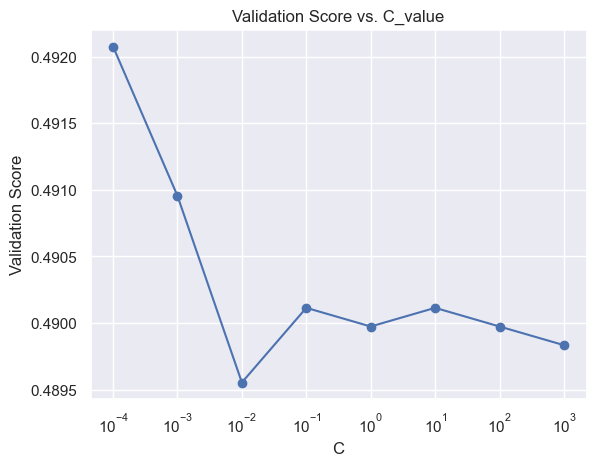

In [12]:
# Plot a line chart of C against validation score with log scale for C
plt.plot(results_df['C'], results_df['Validation Score'], marker='o')
plt.xscale('log')  # Set log scale for C axis
plt.xlabel('C')
plt.ylabel('Validation Score')
plt.title('Validation Score vs. C_value')
plt.grid(True)
plt.show()

Looking at the graph of C values vs Validation score, we can see that a smaller C parameter leads to a slightly better Validation accuracy. This indicates that the model performs better when it is more generalized.

I will use lower C values in my grid search to find the optimum hyper parameters

# Final Model

Best Hyperparameters: {'C': 0.00015, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Model: LogisticRegression(C=0.00015, random_state=42, solver='saga')
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46      2601
           1       0.38      0.01      0.02      2350
           2       0.52      0.83      0.64      3962

    accuracy                           0.50      8913
   macro avg       0.45      0.43      0.37      8913
weighted avg       0.47      0.50      0.42      8913

0.5033097722427914


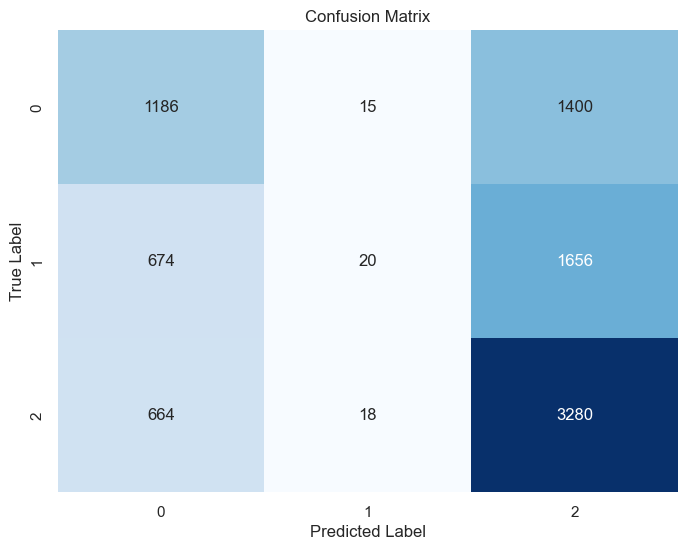

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult'].map({
                                'A': 0,
                                'D': 1,
                                'H': 2
                                    })

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.00005, 0.000075, 0.0001, 0.00015],  # C values around 0.0001
    'penalty': ['l1', 'l2'],       # L1 (Lasso) and L2 (Ridge) penalties
    'solver': ['liblinear', 'saga'],  # Solvers for optimization (use 'liblinear' for small datasets)
    'max_iter': [100, 500, 1000],   # Maximum number of iterations for optimization
}

# Create the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the results
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

# Now, you can use the best_model to make predictions on the validation set or test set
y_test_pred = best_model.predict(X_test_scaled)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model.score(X_test_scaled, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tuning for the best hyper parameters allows for a test accuracy of 50.3%. As you can see from the confusion matrix, the model captures the majority, 83% of class 2, home wins. However, it also incorrectly classifies 48% home win predictions. The model performs even more poorly on class 0, away wins. Incorrectly classifying 53% of away wins and failing to capture 55% of actual away wins with the majority being classified as home wins. As expected the model barely predicts any draws, 53 out of 8913. This is likely due to the large overlap in similarities between a home win and a draw and an away win and a draw.

Looking at the coefficients we can see why draws are predicted so infrequently.

In [14]:
# Get the coefficients for Away Wins
coefficients = best_model.coef_[0]  # Convert the 2D array to a 1D array

feature_names = X_train.columns 

# Combine the coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by magnitude to get the top ones
top_coefficients = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

top_coefficients.head(5)

,Feature,Coefficient
18,AverageShots_away,0.052970
22,AverageShotsOnTarget_away,0.044446
4,Points before match_away,0.043889
20,AverageShotsAgainst_away,-0.039798
17,AverageShots_home,-0.039591


In [15]:
# Get the coefficients for Draws
coefficients = best_model.coef_[1] 

feature_names = X_train.columns 

# Combine the coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by magnitude to get the top ones
top_coefficients = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

top_coefficients.head(5)

,Feature,Coefficient
61,Div_I2,0.018188
17,AverageShots_home,-0.017622
8,Form_away,0.014339
124,HomeCity_Iverness,0.013199
76,HomeCity_Barcelona,-0.012605


In [17]:
# Get the coefficients for Home Wins# Convert the 2D array to a 1D array
coefficients = best_model.coef_[2] 

feature_names = X_train.columns

# Combine the coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by magnitude to get the top ones
top_coefficients = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

top_coefficients.head(5)

,Feature,Coefficient
17,AverageShots_home,0.057213
18,AverageShots_away,-0.044879
9,AverageFullTimeGoalsFor_home,0.044774
22,AverageShotsOnTarget_away,-0.040871
21,AverageShotsOnTarget_home,0.040826
